Wine Quality Prediction
Random Forest Model
Supervised Learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

Data Collection

In [2]:
wine_dataset = pd.read_csv("./WineQuality_Datatset.csv")
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
wine_dataset.shape

(1599, 12)

Data Analysis

In [5]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


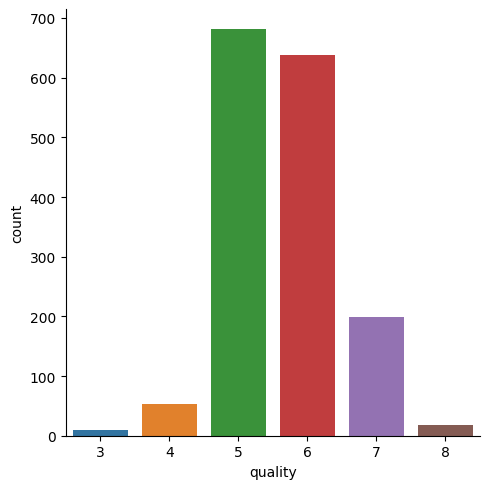

In [6]:
sns.catplot(x='quality',data=wine_dataset, kind = 'count')

Volatile Acidity VS Quality

<Axes: xlabel='quality', ylabel='volatile acidity'>

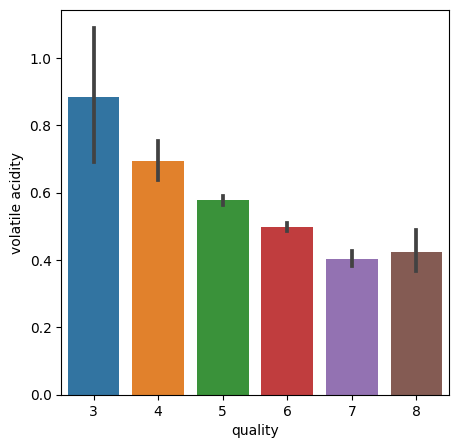

In [7]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data = wine_dataset)

Quality Vs Citric Acid

<Axes: xlabel='quality', ylabel='citric acid'>

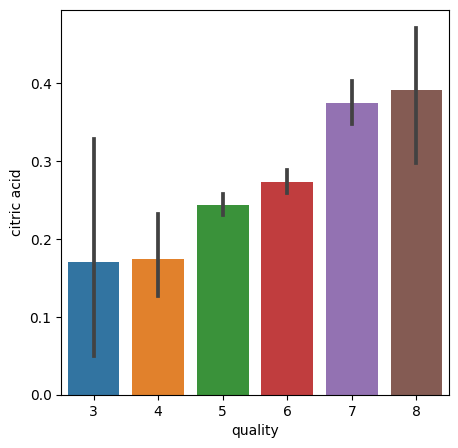

In [8]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data = wine_dataset)

Corelation 

Types of corelation Positive and Negative

In [9]:
# Between quality and all columns
correlation = wine_dataset.corr()

<Axes: >

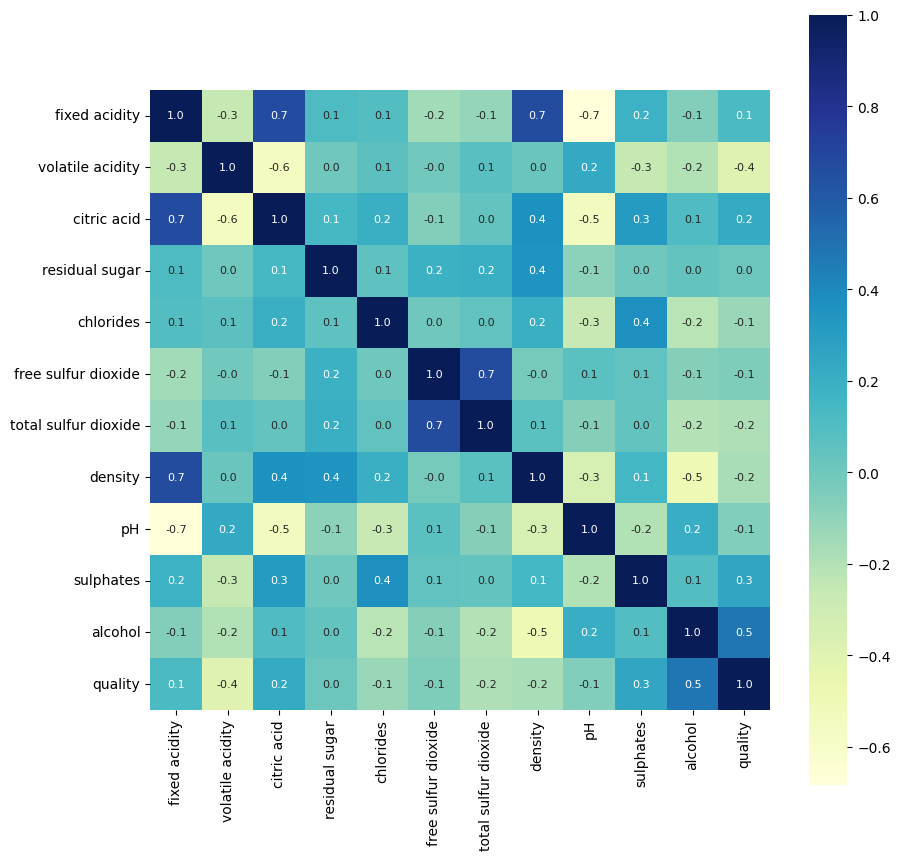

In [10]:
#COnstruction a heat map to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'YlGnBu')

Data Preprocessing

In [11]:
X = wine_dataset.drop('quality', axis=1)
# Y = wine_dataset['quality']

print(X)
# print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [12]:
print(X.shape)

(1599, 11)


In [13]:
# Binarization of Label
Y = wine_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Spliting Testing Data And Training Data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=3)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


Training Random Forest Classifier Model

In [16]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

Evaluation of the Model

In [17]:
X_test_prediction = model.predict(X_test)
testing_accuracy_score = accuracy_score(X_test_prediction,Y_test)
print('Test Data Accuracy: ',testing_accuracy_score)

Test Data Accuracy:  0.90625


Build a Predictive System

In [18]:
input_data = (7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10)
# CHanging the data to numbpy array
input_data_numpy = np.asarray(input_data)

# Reshape the Data as we are predicting the label for only one instance
input_data_reshaped = input_data_numpy.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)
if prediction[0] == 1:
    print("Kadak Maal Hai Bhidu 🍷")
else:
    print("Nah Ye toh Kharab hai....")

[1]
Kadak Maal Hai Bhidu 🍷


c:\Users\lunat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
